In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("../Files/mushrooms.csv")

In [16]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [17]:
X=pd.get_dummies(df.drop("class",axis=1),drop_first=True)

In [18]:
y=df["class"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid={
    "n_estimators":[50,100],
    "learning_rate":[0.1,0.05,0.2],
    "max_depth":[3,4,5],
    }

In [24]:
gb_model=GradientBoostingClassifier()

In [25]:
grid=GridSearchCV(gb_model,param_grid)

In [26]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [28]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [30]:
from sklearn.metrics import classification_report,pair_confusion_matrix,accuracy_score

In [31]:
prediction = grid.predict(X_test)

In [32]:
prediction

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [33]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [35]:
feat_import = grid.best_estimator_.feature_importances_


In [36]:
imp_feat=pd.DataFrame(index=X.columns,data=feat_import,columns=["Importance"])

In [37]:
imp_feat

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,1.037896e-16
cap-shape_k,1.894212e-17
cap-shape_s,0.000000e+00
cap-shape_x,1.155313e-16
...,...
habitat_l,0.000000e+00
habitat_m,3.273903e-17
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [39]:
imp_feat=imp_feat[imp_feat["Importance"]>0.005]

In [40]:
imp_feat

,Importance
bruises_t,0.052720
odor_f,0.010087
odor_l,0.018250
odor_n,0.614763
gill-spacing_w,0.012509
gill-size_n,0.010639
stalk-root_c,0.136012
stalk-root_r,0.047337
stalk-surface-below-ring_y,0.019951
spore-print-color_h,0.011281


In [43]:
imp_feat=imp_feat.sort_values("Importance")

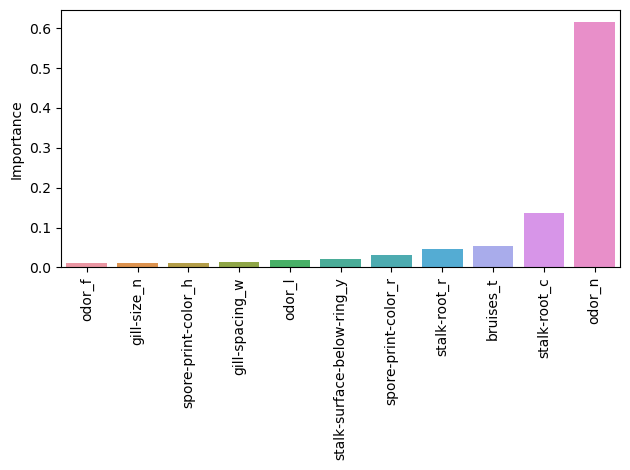

In [44]:
sb.barplot(data=imp_feat,x=imp_feat.index,y="Importance")
plt.xticks(rotation=90)
plt.tight_layout()